In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [2]:
alpha = 0.33
delta = 0.076
capital_output_ratio = 3.32
beta = 0.976

rho = 0.95
sigma_epsilon = 0.007

Using
$$ \bar{Y} = \bar{C} + \bar{I} $$
we have
$$ \frac{\bar{Y}}{\bar{K}} = \frac{\bar{C}}{\bar{K}} + \frac{\bar{I}}{\bar{K}} $$
and thus
$$ \frac{\bar{C}}{\bar{K}} = \frac{\bar{Y}}{\bar{K}} - \delta $$

In [3]:
consumption_capital_ratio = 1/capital_output_ratio - delta
output_consumption_ratio = (1/capital_output_ratio) / consumption_capital_ratio

gamma = 1/beta + 1 - consumption_capital_ratio*(1 - beta * (1 - delta))*(alpha - 1)

nu_kk = (gamma - np.sqrt(gamma**2 - 4/beta))/2
nu_kz = (output_consumption_ratio * (1-rho) + (1-beta*(1-delta))*rho)
nu_kz /= (1/consumption_capital_ratio)*(1-rho + 1/beta - nu_kk) - (1-beta*(1-delta))*(alpha-1)

nu_ck = (1/consumption_capital_ratio)*(1/beta - nu_kk)
nu_cz = output_consumption_ratio- (1/consumption_capital_ratio)*nu_kz

In [4]:
simulated_z_check = np.zeros(500)
simulated_z_check[250] = 1

simulated_c_check = np.zeros(500)
simulated_k_check = np.zeros(500)

simulated_I_check = np.zeros(500)
simulated_y_check = np.zeros(500)
simulated_w_check = np.zeros(500)

In [5]:
AR_shocks = np.random.normal(loc = 0, scale = sigma_epsilon, size = 499)

In [6]:
for i in range(499):
    simulated_z_check[i+1] += rho * simulated_z_check[i] + AR_shocks[i]
    simulated_c_check[i+1] = nu_ck * simulated_k_check[i] + nu_cz * simulated_z_check[i]
    simulated_k_check[i+1] = nu_kk * simulated_k_check[i] + nu_kz * simulated_z_check[i]
    simulated_I_check[i+1] = (simulated_k_check[i+1] - (1-delta)*simulated_k_check[i])/delta
    simulated_y_check[i+1] = simulated_z_check[i+1] + alpha * simulated_k_check[i]
    simulated_w_check[i+1] = simulated_z_check[i+1] + alpha * simulated_k_check[i]

In [7]:
print("The observed standard deviations for output, consumption, investment, and wages are \n{}\n{}\n{}\n{}".format(simulated_y_check[:200].std(),
                                                                                                                   simulated_c_check[:200].std(),
                                                                                                                   simulated_I_check[:200].std(),
                                                                                                                   simulated_w_check[:200].std()))

The observed standard deviations for output, consumption, investment, and wages are 
0.017706979406181315
0.0153824655517772
0.029950543480091442
0.017706979406181315


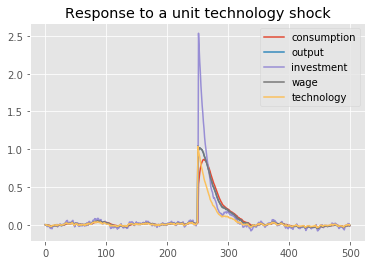

In [8]:
plt.plot(simulated_c_check, label = "consumption")
plt.plot(simulated_y_check, label = "output")
plt.plot(simulated_I_check, label = "investment")
plt.plot(simulated_w_check, label = "wage")
plt.plot(simulated_z_check, label = "technology")
plt.legend()
plt.title("Response to a unit technology shock")
plt.show()

In [9]:
rho = 1

consumption_capital_ratio = 1/capital_output_ratio - delta
output_consumption_ratio = (1/capital_output_ratio) / consumption_capital_ratio

gamma = 1/beta + 1 - consumption_capital_ratio*(1 - beta * (1 - delta))*(alpha - 1)

nu_kk = (gamma - np.sqrt(gamma**2 - 4/beta))/2
nu_kz = (output_consumption_ratio * (1-rho) + (1-beta*(1-delta))*rho)
nu_kz /= (1/consumption_capital_ratio)*(1-rho + 1/beta - nu_kk) - (1-beta*(1-delta))*(alpha-1)

nu_ck = (1/consumption_capital_ratio)*(1/beta - nu_kk)
nu_cz = output_consumption_ratio- (1/consumption_capital_ratio)*nu_kz

simulated_z_check = np.zeros(500)
simulated_z_check[250] = 1

simulated_c_check = np.zeros(500)
simulated_k_check = np.zeros(500)

simulated_I_check = np.zeros(500)
simulated_y_check = np.zeros(500)
simulated_w_check = np.zeros(500)

AR_shocks = np.random.normal(loc = 0, scale = sigma_epsilon, size = 499)

for i in range(499):
    simulated_z_check[i+1] += rho * simulated_z_check[i] + AR_shocks[i]
    simulated_c_check[i+1] = nu_ck * simulated_k_check[i] + nu_cz * simulated_z_check[i]
    simulated_k_check[i+1] = nu_kk * simulated_k_check[i] + nu_kz * simulated_z_check[i]
    simulated_I_check[i+1] = (simulated_k_check[i+1] - (1-delta)*simulated_k_check[i])/delta
    simulated_y_check[i+1] = simulated_z_check[i+1] + alpha * simulated_k_check[i]
    simulated_w_check[i+1] = simulated_z_check[i+1] + alpha * simulated_k_check[i]

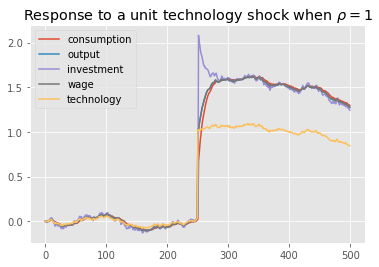

In [10]:
plt.plot(simulated_c_check, label = "consumption")
plt.plot(simulated_y_check, label = "output")
plt.plot(simulated_I_check, label = "investment")
plt.plot(simulated_w_check, label = "wage")
plt.plot(simulated_z_check, label = "technology")
plt.legend()
plt.title("Response to a unit technology shock when " + "$\\rho=1$")
plt.show()

In [11]:
rho = 0.95
alpha = 2/3

consumption_capital_ratio = 1/capital_output_ratio - delta
output_consumption_ratio = (1/capital_output_ratio) / consumption_capital_ratio

gamma = 1/beta + 1 - consumption_capital_ratio*(1 - beta * (1 - delta))*(alpha - 1)

nu_kk = (gamma - np.sqrt(gamma**2 - 4/beta))/2
nu_kz = (output_consumption_ratio * (1-rho) + (1-beta*(1-delta))*rho)
nu_kz /= (1/consumption_capital_ratio)*(1-rho + 1/beta - nu_kk) - (1-beta*(1-delta))*(alpha-1)

nu_ck = (1/consumption_capital_ratio)*(1/beta - nu_kk)
nu_cz = output_consumption_ratio- (1/consumption_capital_ratio)*nu_kz

simulated_z_check = np.zeros(500)
simulated_z_check[250] = 1

simulated_c_check = np.zeros(500)
simulated_k_check = np.zeros(500)

simulated_I_check = np.zeros(500)
simulated_y_check = np.zeros(500)
simulated_w_check = np.zeros(500)

AR_shocks = np.random.normal(loc = 0, scale = sigma_epsilon, size = 499)

for i in range(499):
    simulated_z_check[i+1] += rho * simulated_z_check[i] + AR_shocks[i]
    simulated_c_check[i+1] = nu_ck * simulated_k_check[i] + nu_cz * simulated_z_check[i]
    simulated_k_check[i+1] = nu_kk * simulated_k_check[i] + nu_kz * simulated_z_check[i]
    simulated_I_check[i+1] = (simulated_k_check[i+1] - (1-delta)*simulated_k_check[i])/delta
    simulated_y_check[i+1] = simulated_z_check[i+1] + alpha * simulated_k_check[i]
    simulated_w_check[i+1] = simulated_z_check[i+1] + alpha * simulated_k_check[i]

In [12]:
print("The observed standard deviations for output, consumption, investment, and wages are now \n{}\n{}\n{}\n{}".format(simulated_y_check[:200].std(),
                                                                                                                   simulated_c_check[:200].std(),
                                                                                                                   simulated_I_check[:200].std(),
                                                                                                                   simulated_w_check[:200].std()))

The observed standard deviations for output, consumption, investment, and wages are now 
0.03365497430810729
0.016977041904474344
0.054900366850742885
0.03365497430810729


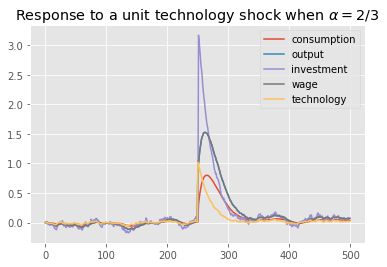

In [13]:
plt.plot(simulated_c_check, label = "consumption")
plt.plot(simulated_y_check, label = "output")
plt.plot(simulated_I_check, label = "investment")
plt.plot(simulated_w_check, label = "wage")
plt.plot(simulated_z_check, label = "technology")
plt.legend()
plt.title("Response to a unit technology shock when " + "$\\alpha=2/3$")
plt.show()

In [14]:
rho = 1
alpha = 2/3

consumption_capital_ratio = 1/capital_output_ratio - delta
output_consumption_ratio = (1/capital_output_ratio) / consumption_capital_ratio

gamma = 1/beta + 1 - consumption_capital_ratio*(1 - beta * (1 - delta))*(alpha - 1)

nu_kk = (gamma - np.sqrt(gamma**2 - 4/beta))/2
nu_kz = (output_consumption_ratio * (1-rho) + (1-beta*(1-delta))*rho)
nu_kz /= (1/consumption_capital_ratio)*(1-rho + 1/beta - nu_kk) - (1-beta*(1-delta))*(alpha-1)

nu_ck = (1/consumption_capital_ratio)*(1/beta - nu_kk)
nu_cz = output_consumption_ratio- (1/consumption_capital_ratio)*nu_kz

simulated_z_check = np.zeros(500)
simulated_z_check[250] = 1

simulated_c_check = np.zeros(500)
simulated_k_check = np.zeros(500)

simulated_I_check = np.zeros(500)
simulated_y_check = np.zeros(500)
simulated_w_check = np.zeros(500)

AR_shocks = np.random.normal(loc = 0, scale = sigma_epsilon, size = 499)

for i in range(499):
    simulated_z_check[i+1] += rho * simulated_z_check[i] + AR_shocks[i]
    simulated_c_check[i+1] = nu_ck * simulated_k_check[i] + nu_cz * simulated_z_check[i]
    simulated_k_check[i+1] = nu_kk * simulated_k_check[i] + nu_kz * simulated_z_check[i]
    simulated_I_check[i+1] = (simulated_k_check[i+1] - (1-delta)*simulated_k_check[i])/delta
    simulated_y_check[i+1] = simulated_z_check[i+1] + alpha * simulated_k_check[i]
    simulated_w_check[i+1] = simulated_z_check[i+1] + alpha * simulated_k_check[i]

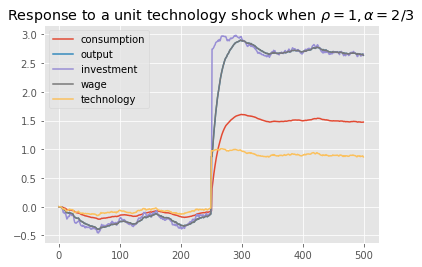

In [15]:
plt.plot(simulated_c_check, label = "consumption")
plt.plot(simulated_y_check, label = "output")
plt.plot(simulated_I_check, label = "investment")
plt.plot(simulated_w_check, label = "wage")
plt.plot(simulated_z_check, label = "technology")
plt.legend()
plt.title("Response to a unit technology shock when " + "$\\rho=1, \\alpha=2/3$")
plt.show()